# Wordcloud examples

## Imports

In [1]:
# Reload modules every time before executing the Python code typed
%load_ext autoreload
%autoreload 2

# Import from code root directory
import sys; sys.path.insert(0, '../..')

from explanations.wordcloud import Wordcloud
from wordcloud import STOPWORDS

## Data

In [2]:
# This code was only used one time to set the data below
if(False):
    directory_pickle = '/home/eml4u/EML4U/data/amazon-complete/'
    from data.amazon_pickle_reader import AmazonPickleReader
    reader = AmazonPickleReader(directory_pickle)
    print(reader.get_text(84090 + 0), end='\n\n')
    print(reader.get_text(84090 + 1), end='\n\n')
    print(reader.get_text(84090 + 2), end='\n\n')
    print(reader.get_text(7911683 - 0), end='\n\n')
    print(reader.get_text(7911683 - 1), end='\n\n')
    print(reader.get_text(7911683 - 2), end='\n\n')

In [3]:
a = []
a.append("Rupert Everett steals the show! In my opinion, it isn't the character played by Dermot Mulroney who is the best friend of Julia Roberts' character. It is Rupert Everett, her gay friend. It is Rupert who flys out to support her in her travail over  Mulroney's upcoming marriage, giving her his time, his care and his  affection. What an amazing person! I love Julia Roberts and go to any movie  she makes, but the character she plays in this movie is immature and not  very sympathetic. However, it is the very immaturity of her character that  leads to all the conflict, so I can't complain too much! Overall, the movie  has some extremely funny moments.")
a.append("Apocolypse Now Apocolypse Now is one of the greatest war movies of all time. It is realistic, and suspensful, and has a beleavable plot, and great special effects.")
a.append("Great Drinking Movie OK First off, the movie was solid, good plot, great actors, not Elle Though, She should have shown her breast, but over all a 4 star rating. <p>Now what I mean about the Drinking. While sent to Italy for the Bosnia  Conflict my cohorts and I rented this movie. We found that A. Hopkins  Charater gets his name called several times during the movie, so much so  that we started to do shots everytime &quot;CHARLES&quot; was said. We  never make it to the end of the movie without being BOMBED out of our  gords...I won't say how many times his name is said, count for your  self...<p>Ok have fun and Don't drink and Drive...Arrive Alive.!")
b = []
b.append("Movie. Little darlings looking I saw this movie when I was in high school and loved Tatum O'neal and Kristy McNicholl. Then it was on TCM a few months ago and the stupid cable went out. So now I am looking for it on VHS or DVD> Please get this in soon.")
b.append("Movie. I Love Lucy 2nd Season The video arrived on time in perfect condition. It was a gift and all I really know is that he loves watching the shows and was delighted with them.")
b.append("Movie. Fun My daughter is 5 and loves Tim Burton. This is visually fun, off-beat and entertaining. I certainly don't mind having it on in the background and love that it is visually more interesting than a lot of stuff out there.")

# Wordclouds and data preparation

In [4]:
wordcloud = Wordcloud()
tokens_a = wordcloud.get_tokens(a)
tokens_b = wordcloud.get_tokens(b)

## Tokens: Count words in texts

To create wordclouds, Counter objects are required. They can be created using the `get_tokens()` method (see above).

In [5]:
# Simple example
print('Default tokens:')
print(tokens_a.most_common(5), end=' ...\n')
print()

# Include words with length [0, 30] instead of [2, 15]
print('Tokens including short and long words:')
print(wordcloud.get_tokens(a, min_len=0, max_len=30).most_common(5), end=' ...\n')

Default tokens:
[('movie', 8), ('character', 4), ('rupert', 3), ('now', 3), ('great', 3)] ...

Tokens including short and long words:
[('movie', 8), ('t', 4), ('character', 4), ('rupert', 3), ('now', 3)] ...


In [6]:
# Stopwords are excluded
print('Default stopwords:', STOPWORDS)
print()

# Do not use any stopwords
print('Tokens with default stopwords:', tokens_a.most_common(5), end=' ...\n')
print('Tokens without stopwords:     ', wordcloud.get_tokens(a, stopwords={}).most_common(5), end=' ...\n')

Default stopwords: {'having', 'own', 'against', 'her', 'so', "can't", "we've", 'had', 'shall', "couldn't", 'than', "wasn't", 'they', 'whom', "wouldn't", 'being', "didn't", "where's", 'after', 'k', 'over', 'that', "i'd", 'your', 'would', 'down', 'of', "you'll", 'http', 'and', 'ought', 'at', "she's", "i've", "they've", 'too', 'all', 'a', "when's", 'be', 'otherwise', "we'd", 'but', 'for', 'yourselves', 'itself', "why's", 'on', 'only', 'off', 'get', 'while', 'out', 'can', "shouldn't", 'in', 'further', "hasn't", "don't", 'other', 'yours', 'each', 'no', 'our', "won't", "let's", 'like', "aren't", "i'm", 'during', "who's", 'very', 'just', "it's", 'before', 'was', 'www', "you'd", 'because', 'both', "what's", 'hence', 'should', 'herself', 'how', 'theirs', 'there', 'again', "doesn't", 'through', "shan't", "we'll", 'however', "here's", 'hers', 'until', 'were', 'or', "that's", 'we', 'these', "we're", 'by', 'same', 'since', 'as', "there's", 'am', 'once', 'myself', "weren't", 'have', 'yourself', 'abo

## Modify token counters

E.g. to remove the word `movie` from movie reviews, as it is too general.

In [7]:
print(tokens_a.most_common(5), end=' ...\n')
print(tokens_b.most_common(5), end=' ...\n')

print('Tokens at least 2.0 times more in a than in b: ', wordcloud.remove_tokens(tokens_a, tokens_b).most_common(5), end=' ...\n')
print('Tokens at least 2.1 times more in a than in b: ', wordcloud.remove_tokens(tokens_a, tokens_b, factor=2.1).most_common(5), end=' ...\n')

[('movie', 8), ('character', 4), ('rupert', 3), ('now', 3), ('great', 3)] ...
[('movie', 4), ('looking', 2), ('love', 2), ('loves', 2), ('fun', 2)] ...
Tokens at least 2.0 times more in a than in b:  [('movie', 8), ('now', 3), ('time', 2)] ...
Tokens at least 2.1 times more in a than in b:  [('now', 3)] ...


## Wordcloud

The default font is *Roboto Condensed Medium* and its path on debian systems.  
If not installed, another font will be used.

- Check if installed on debian: `fc-list | grep 'RobotoCondensed-Medium.ttf'`
- Install on debian: `sudo apt-get -y install fonts-roboto`
- Download font: [https://fonts.google.com/specimen/Roboto+Condensed](https://fonts.google.com/specimen/Roboto+Condensed)

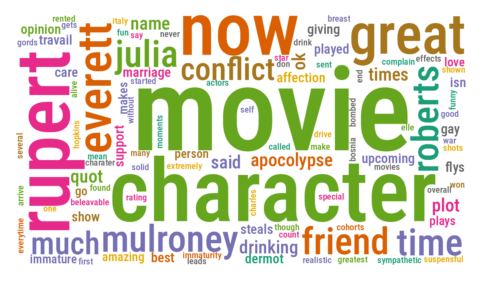

In [8]:
# Minimal example
wordcloud.plot(wordcloud.get_wordcloud(tokens_a))

You can specify additional parameters, available at [https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)  
E.g. to use another font:

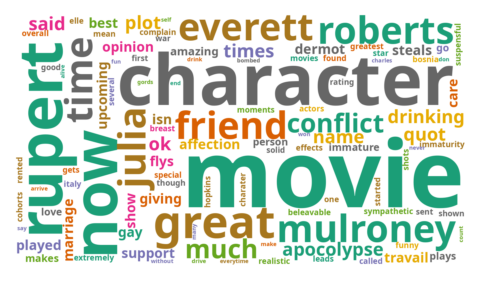

In [9]:
parameters = {'font_path':'/usr/share/fonts/truetype/noto/NotoSans-Bold.ttf'}
cloud = wordcloud.get_wordcloud(tokens_a, parameters)
wordcloud.plot(cloud)

To get other image sizes, use the `figsize` parameter.  
The default ratio is 16:9.

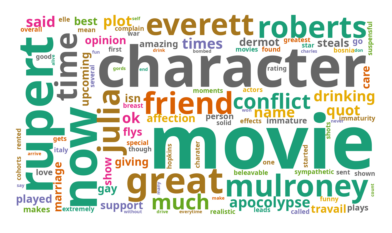

In [10]:
wordcloud.plot(cloud, figsize=[16/5, 9/5])